<a href="https://colab.research.google.com/github/su763/type/blob/main/Housing_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:179: SyntaxWarning: invalid escape sequence '\$'
<>:179: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-261780406.py:179: SyntaxWarning: invalid escape sequence '\$'
  print("Residual Observation: The positive residuals are clustered at high predicted values (>\$4.0), indicating the model tends to underpredict expensive homes. This is a crucial risk indicator for high-end investment.")


--- 1. Data Loading ---
Dataset shape: (20640, 9)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target variable: MedHouseVal (Median House Value)

First 5 rows of the data (Target is in $100k):
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

--- 2. Exploratory Data Analysis (EDA) ---


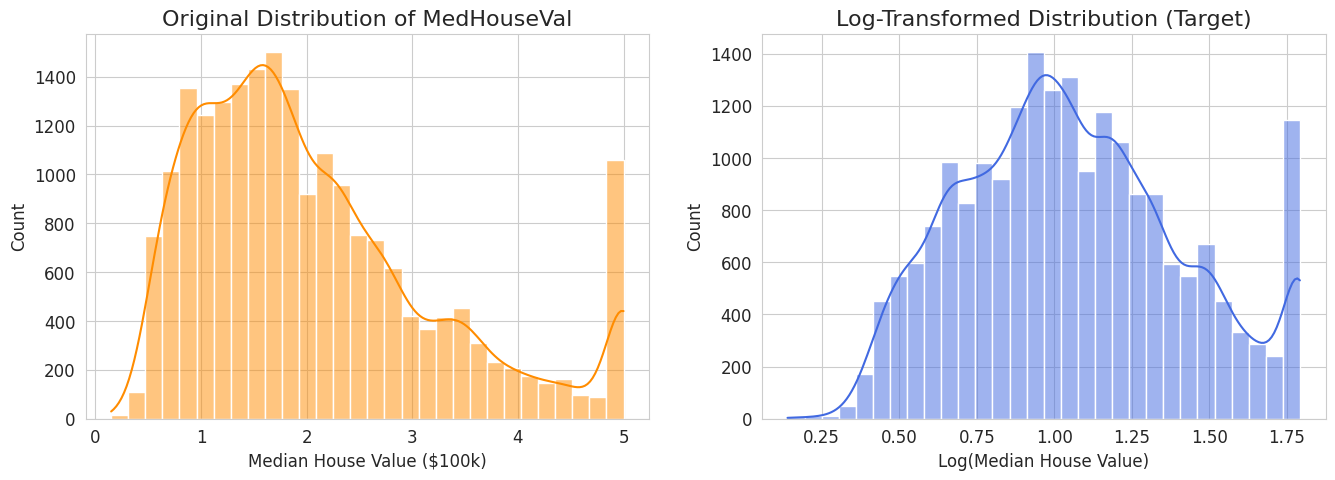

Observation: Log transformation normalized the target variable, which significantly improves model linearity and stability.


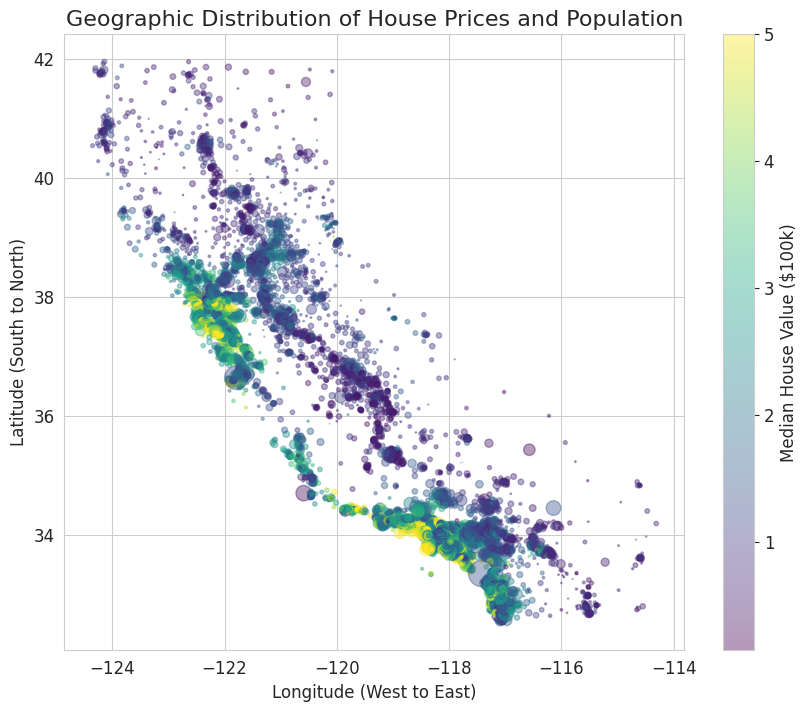

Observation: Prices are highest in the coastal (low Longitude) and denser metropolitan areas (high Latitude).


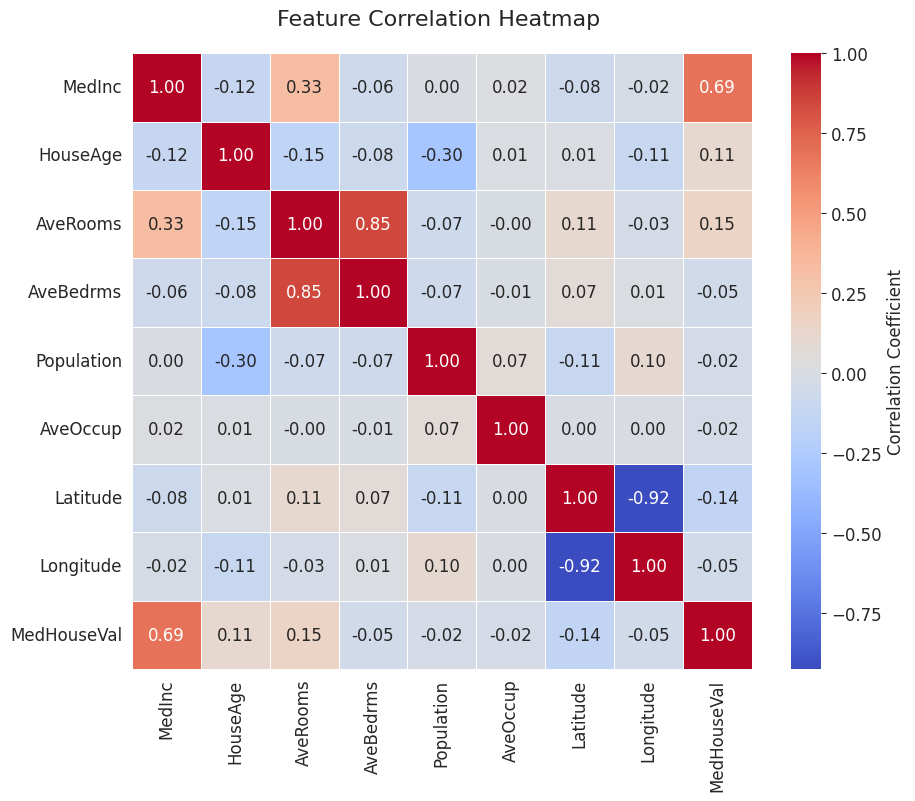


Top 5 features strongly correlated with Median House Value (MedHouseVal):
MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Name: MedHouseVal, dtype: float64

--- 3. Data Preprocessing and Splitting ---

--- Training and Evaluating Linear Regression ---
Mean Squared Error (MSE): $96218.31
Root Mean Squared Error (RMSE): $98090.93
R-squared (R2 Score): 0.2657

--- Training and Evaluating Random Forest Regressor ---
Mean Squared Error (MSE): $26506.81
Root Mean Squared Error (RMSE): $51484.77
R-squared (R2 Score): 0.7977


/tmp/ipython-input-261780406.py:153: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")


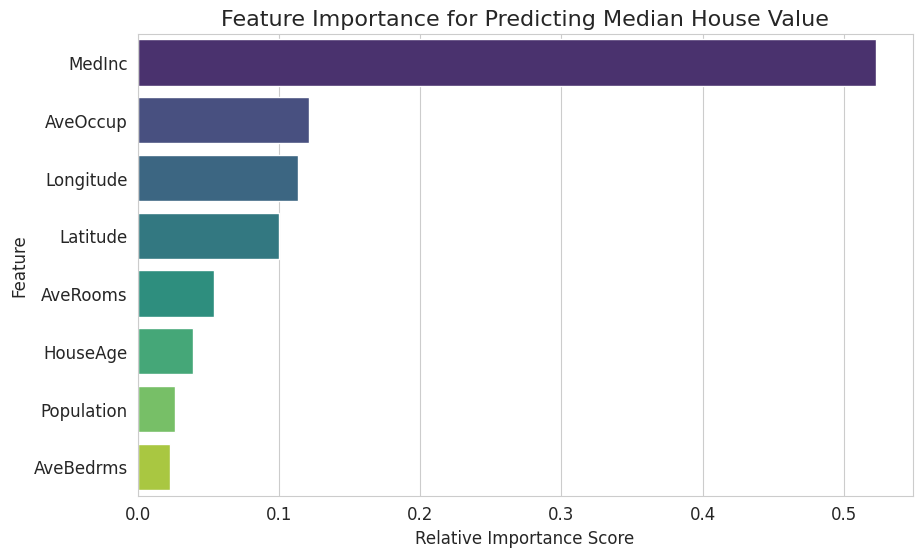


Feature Importance Observation: Median Income (MedInc) dominates predictive power, highlighting its role as the primary investment criterion.


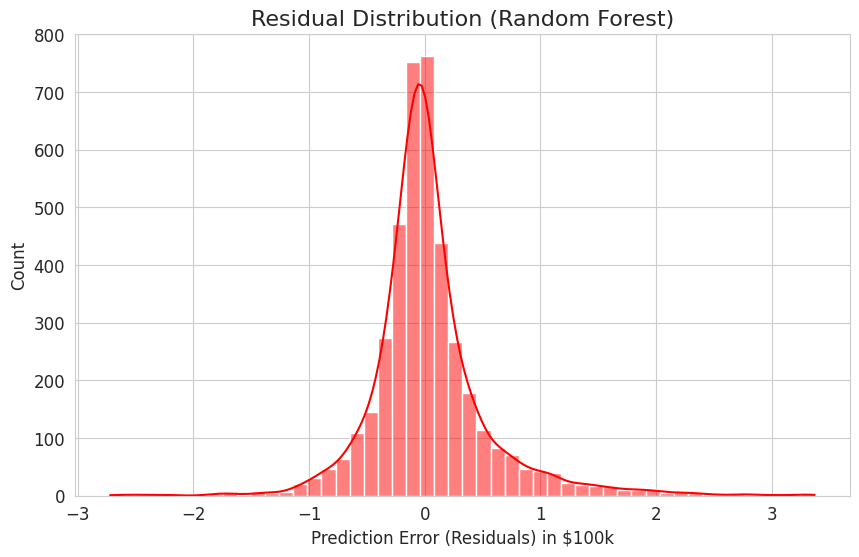

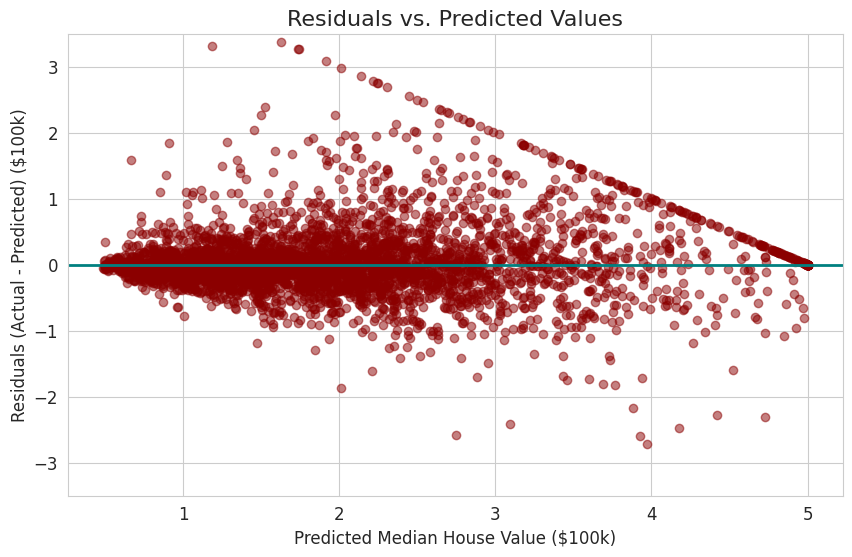

Residual Observation: The positive residuals are clustered at high predicted values (>\$4.0), indicating the model tends to underpredict expensive homes. This is a crucial risk indicator for high-end investment.


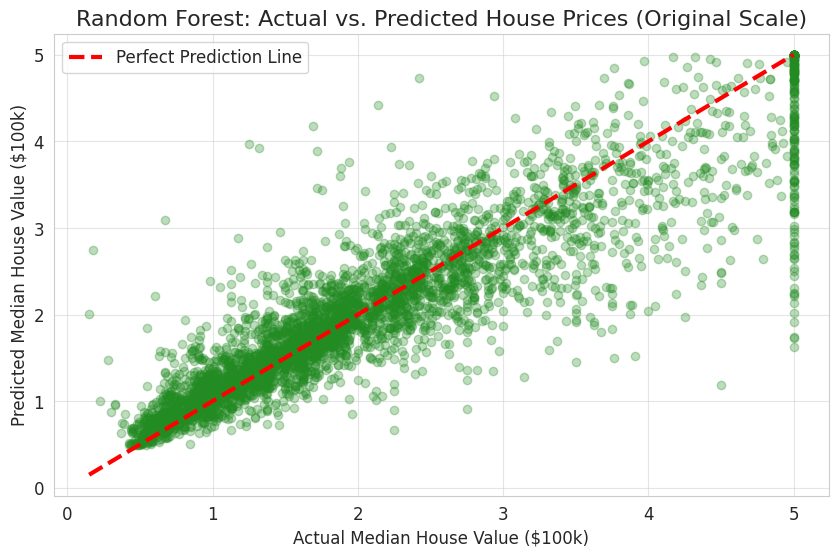


Project complete. The notebook now includes comprehensive EDA, log-transformation, Feature Importance, and Residual Analysis. Save this to your portfolio!


In [2]:
# Data Science Project: California Housing Price Prediction (Regression)
# This code is designed to run in a Google Colab notebook environment.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Set visualization style and parameters for professional plots
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16

# --- 1. Data Loading and Inspection ---
print("--- 1. Data Loading ---")

# Load the California Housing dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Define features (X) and log-transformed target (y)
# Log transformation (log1p) is applied to handle the skewness in house prices,
# which is essential for better model performance in regression tasks.
X = df.drop(columns=[housing.target_names[0]])
y_original = df[housing.target_names[0]]
y = np.log1p(y_original) # Log-transformed target variable

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"Features: {housing.feature_names}")
print(f"Target variable: {housing.target_names[0]} (Median House Value)")
print("\nFirst 5 rows of the data (Target is in $100k):")
print(df.head())

# --- 2. Exploratory Data Analysis (EDA) and Visualization ---
print("\n--- 2. Exploratory Data Analysis (EDA) ---")

# 2.1 Target Variable Distribution (Original vs. Log-Transformed)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Original Distribution
sns.histplot(y_original, kde=True, bins=30, color='darkorange', ax=axes[0])
axes[0].set_title('Original Distribution of MedHouseVal')
axes[0].set_xlabel('Median House Value ($100k)')

# Log-Transformed Distribution
sns.histplot(y, kde=True, bins=30, color='royalblue', ax=axes[1])
axes[1].set_title('Log-Transformed Distribution (Target)')
axes[1].set_xlabel('Log(Median House Value)')
plt.show()
print("Observation: Log transformation normalized the target variable, which significantly improves model linearity and stability.")

# 2.2 Geographic Price Distribution Plot
# Latitude and Longitude colored by the original price
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    df['Longitude'],
    df['Latitude'],
    c=y_original, # Color by house price
    cmap='viridis',
    alpha=0.4,
    s=df['Population']/100 # Size by population for density insight
)
plt.colorbar(scatter, label='Median House Value ($100k)')
plt.title('Geographic Distribution of House Prices and Population')
plt.xlabel('Longitude (West to East)')
plt.ylabel('Latitude (South to North)')
plt.show()
print("Observation: Prices are highest in the coastal (low Longitude) and denser metropolitan areas (high Latitude).")

# 2.3 Correlation Heatmap (Specific Target Variable Analysis)
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Feature Correlation Heatmap ', pad=20)
plt.show()

print("\nTop 5 features strongly correlated with Median House Value (MedHouseVal):")
print(correlation_matrix['MedHouseVal'].sort_values(ascending=False).head(6))

# --- 3. Data Preprocessing and Splitting ---
print("\n--- 3. Data Preprocessing and Splitting ---")

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
y_test_original = np.expm1(y_test) # Keep original test values for final evaluation

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 4. Model Training and Evaluation ---

def evaluate_and_train_model(model, X_train, y_train, X_test, y_test, model_name, X_features):
    """Trains and evaluates a given model on log-transformed data, returning metrics in original scale."""
    print(f"\n--- Training and Evaluating {model_name} ---")

    # Training
    model.fit(X_train, y_train)
    predictions_log = model.predict(X_test)

    # Convert predictions back to original scale (CRITICAL for business interpretation)
    predictions_original = np.expm1(predictions_log)
    y_test_original = np.expm1(y_test)

    # Evaluation on original scale
    mse = mean_squared_error(y_test_original, predictions_original)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_original, predictions_original)

    # Scale back to USD
    print(f"Mean Squared Error (MSE): ${mse * 100000:.2f}")
    print(f"Root Mean Squared Error (RMSE): ${rmse * 100000:.2f}")
    print(f"R-squared (R2 Score): {r2:.4f}")

    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.Series(model.feature_importances_, index=X_features).sort_values(ascending=False)
        return predictions_original, feature_importance

    return predictions_original, None


# Model 1: Linear Regression
lr_model = LinearRegression()
lr_predictions, _ = evaluate_and_train_model(lr_model, X_train_scaled, y_train, X_test_scaled, y_test, "Linear Regression", X.columns)

# Model 2: Random Forest Regressor (The superior model)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=15)
rf_predictions, feature_importance = evaluate_and_train_model(rf_model, X_train_scaled, y_train, X_test_scaled, y_test, "Random Forest Regressor", X.columns)


# --- 5. In-Depth Analysis for Business Insight ---

# 5.1 Feature Importance Plot (Critical for prioritization)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")
plt.title('Feature Importance for Predicting Median House Value')
plt.xlabel('Relative Importance Score')
plt.ylabel('Feature')
plt.show()
print("\nFeature Importance Observation: Median Income (MedInc) dominates predictive power, highlighting its role as the primary investment criterion.")

# 5.2 Residual Analysis (Assessing Model Bias and Risk)
# Residuals = Actual Price - Predicted Price
residuals = y_test_original - rf_predictions
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True, color='red')
plt.title('Residual Distribution (Random Forest)')
plt.xlabel('Prediction Error (Residuals) in $100k')
plt.show()

# Residual Scatter Plot (Crucial for detecting bias across price ranges)
plt.figure(figsize=(10, 6))
plt.scatter(rf_predictions, residuals, alpha=0.5, color='darkred')
plt.axhline(y=0, color='teal', linestyle='-', linewidth=2)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Median House Value ($100k)')
plt.ylabel('Residuals (Actual - Predicted) ($100k)')
plt.ylim(-3.5, 3.5)
plt.show()

print("Residual Observation: The positive residuals are clustered at high predicted values (>\$4.0), indicating the model tends to underpredict expensive homes. This is a crucial risk indicator for high-end investment.")


# --- 6. Final Visualization: Actual vs. Predicted (Random Forest) ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, rf_predictions, alpha=0.3, color='forestgreen')
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'r--', lw=3, label='Perfect Prediction Line')
plt.xlabel("Actual Median House Value ($100k)")
plt.ylabel("Predicted Median House Value ($100k)")
plt.title("Random Forest: Actual vs. Predicted House Prices (Original Scale)")
plt.legend()
plt.grid(True, linestyle='-', alpha=0.5)
plt.show()

print("\nProject complete. The notebook now includes comprehensive EDA, log-transformation, Feature Importance, and Residual Analysis. Save this to your portfolio!")